In [165]:
# !pip install tensorflow

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow  
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle
import datetime

In [167]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [168]:
df.shape

(10000, 14)

In [169]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [170]:
# df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
# df

In [171]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [172]:
label_encoder = LabelEncoder()
df['Gender']  = label_encoder.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [173]:
#here we cant us label encoding for Geography,so we will use Onehotencoder
onehoter_enoder_geo = OneHotEncoder()
geo =  onehoter_enoder_geo.fit_transform(df[['Geography']])
geo

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [174]:
onehoter_enoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [175]:
geo_data = pd.DataFrame(geo.toarray(),columns=onehoter_enoder_geo.get_feature_names_out(['Geography']))

In [176]:
geo_data

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [177]:
df = pd.concat([df.drop('Geography',axis=1),geo_data],axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [178]:
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder,file)
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehoter_enoder_geo,file)

In [179]:
X = df.drop('Exited',axis=1)
y = df['Exited']
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_train

array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  1.00175153,
        -0.57831252, -0.57773517],
       [ 0.91362605,  0.90750738, -0.65993547, ..., -0.99825153,
         1.72916886, -0.57773517],
       [ 1.07927399, -1.10191942, -0.18493108, ..., -0.99825153,
         1.72916886, -0.57773517],
       ...,
       [ 0.16821031, -1.10191942, -0.18493108, ...,  1.00175153,
        -0.57831252, -0.57773517],
       [ 0.37527024,  0.90750738, -0.37493284, ..., -0.99825153,
        -0.57831252,  1.73089688],
       [ 1.56586482,  0.90750738,  1.14508121, ..., -0.99825153,
        -0.57831252,  1.73089688]], shape=(8000, 12))

In [180]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [181]:
X_train.shape

(8000, 12)

In [182]:
model = Sequential(                             
    [
    Dense(64,activation='relu', input_dim=X_train.shape[1]),
    # Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
    ]
)


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)#0,01
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [184]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
## Set up the Tensorboard
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [186]:
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [187]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard


In [188]:
early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',
    patience  = 15,
    mode='min',    
    restore_best_weights=True
)

In [189]:
print(early_stopping_callback)
print(tensorflow_callback)


In [190]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8000, 12) (8000,)
(2000, 12) (2000,)


In [191]:
history = model.fit(
    X_train,y_train,batch_size=50,epochs=100,verbose=1,
    # validation_split=0.3,
    validation_data=(X_test, y_test),
    callbacks = [early_stopping_callback,tensorflow_callback]
)
# validation_data = (X_test,y_test)


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7343 - loss: 0.5330 - val_accuracy: 0.8110 - val_loss: 0.4286
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8189 - loss: 0.4355 - val_accuracy: 0.8285 - val_loss: 0.4009
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8359 - loss: 0.4017 - val_accuracy: 0.8530 - val_loss: 0.3683
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8468 - loss: 0.3818 - val_accuracy: 0.8595 - val_loss: 0.3490
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8531 - loss: 0.3695 - val_accuracy: 0.8630 - val_loss: 0.3449
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8566 - loss: 0.3587 - val_accuracy: 0.8680 - val_loss: 0.3400
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.3581 - val_accuracy: 0.8690 - val_loss: 0.3370
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8601 - loss: 0.3547 - val_acc

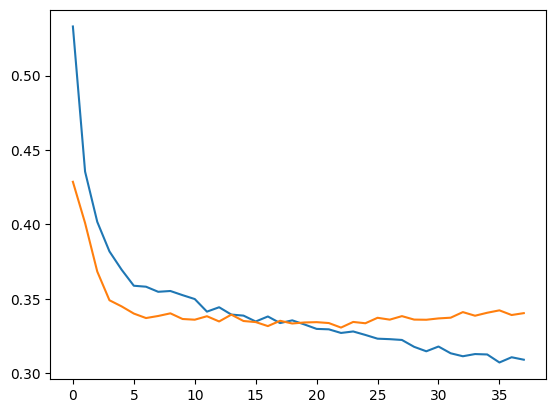

In [192]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [193]:
history.history

{'accuracy': [0.734250009059906,
  0.8188750147819519,
  0.8358749747276306,
  0.846750020980835,
  0.8531249761581421,
  0.8566250205039978,
  0.8567500114440918,
  0.8601250052452087,
  0.8610000014305115,
  0.859749972820282,
  0.8586249947547913,
  0.8613749742507935,
  0.8662499785423279,
  0.8648750185966492,
  0.8641250133514404,
  0.8663750290870667,
  0.8688750267028809,
  0.8663750290870667,
  0.8675000071525574,
  0.8668749928474426,
  0.8703749775886536,
  0.8711249828338623,
  0.8690000176429749,
  0.8684999942779541,
  0.8730000257492065,
  0.8722500205039978,
  0.8712499737739563,
  0.8698750138282776,
  0.8731250166893005,
  0.875,
  0.8730000257492065,
  0.8740000128746033,
  0.8767499923706055,
  0.878250002861023,
  0.8738750219345093,
  0.875374972820282,
  0.8761249780654907,
  0.8758749961853027],
 'loss': [0.5329967737197876,
  0.43546822667121887,
  0.4016891121864319,
  0.38182029128074646,
  0.36950257420539856,
  0.35874107480049133,
  0.3580959141254425,
  0

In [194]:
model.save('model.h5')

In [195]:
# Load Tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [198]:
%tensorboard --logdir logs/fit20251020-223939

Reusing TensorBoard on port 6007 (pid 19702), started 0:00:08 ago. (Use '!kill 19702' to kill it.)